# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key
    
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [ ]:
print(weather_api_key)

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Trying it out on one. 

# city = "London"
# url = "http://api.openweathermap.org/data/2.5/weather?"
# params = {
#     "appid":weather_api_key,
#     "units":"imperial",
#     "q":city,    
#     }

# city_url = requests.get(url, params=params)

# print(city_url.url)

In [ ]:
# Still need to JSON-ify this url. Testing this all out with one city to ensure it works.

# city_weather = city_url.json()

# city_lat = city_weather["coord"]["lat"]
# city_lon = city_weather["coord"]["lon"]
# city_max_temp = city_weather["main"]["temp_max"]
# city_humidity = city_weather["main"]["humidity"]
# city_clouds = city_weather["clouds"]["all"]
# city_wind = city_weather["wind"]["speed"]
# city_country = city_weather["sys"]["country"]
# city_date = city_weather["dt"]

# print(f"City: {city}")
# print(f"City Latitude: {city_lat}")
# print(f"City Longitude: {city_lon}")
# print(f"Max Temp: {city_max_temp}")
# print(f"Humidity: {city_humidity}")
# print(f"Cloudiness: {city_clouds}")
# print(f"Wind Speed: {city_wind}")
# print(f"Country: {city_country}")
# print(f"Date: {city_date}")

In [ ]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    params = {
    "appid":weather_api_key,
    "units":"imperial",
    "q":city,    
    }
    
    city_url = requests.get(url, params=params)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_url.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

In [ ]:
city_data

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(
    city_data
)

# Show Record Count
city_data_df.count()

In [ ]:
# Display sample data
city_data_df.head()

In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,51.66,92,75,1.14,AU,1682949208
1,svetlaya,46.5389,138.3297,36.19,88,22,7.63,RU,1682949208
2,north bend,43.4065,-124.2243,49.86,94,75,5.75,US,1682949208
3,saldanha,-33.0117,17.9442,61.56,74,100,15.77,ZA,1682949208
4,kamenka,51.3223,42.7678,58.46,71,96,7.31,RU,1682949208


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

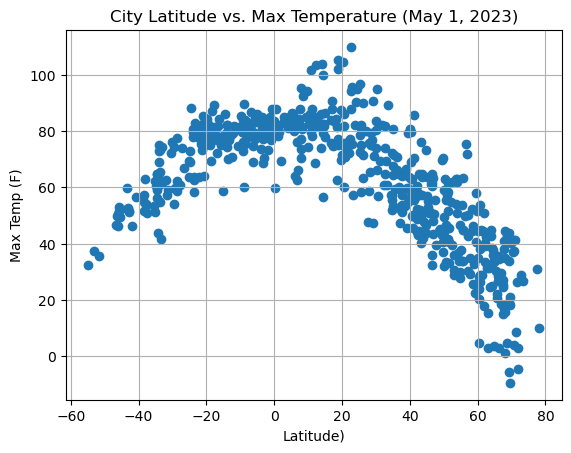

In [3]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])


# Incorporate the other graph properties

plt.xlabel("Latitude)")
plt.ylabel("Max Temp (F)")
plt.title("City Latitude vs. Max Temperature (May 1, 2023)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
# plt.show()

#### Latitude Vs. Humidity

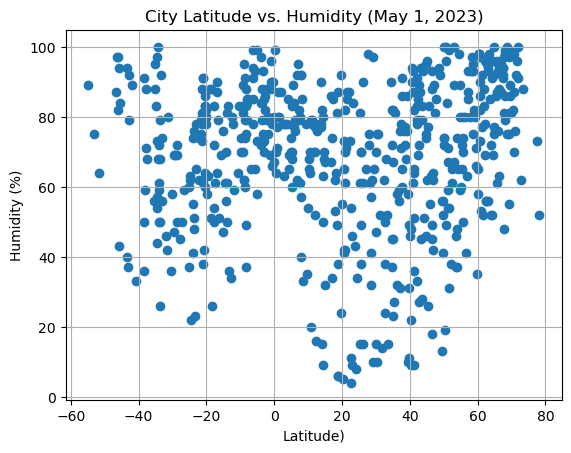

In [4]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties

plt.xlabel("Latitude)")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (May 1, 2023)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
# plt.show()

#### Latitude Vs. Cloudiness

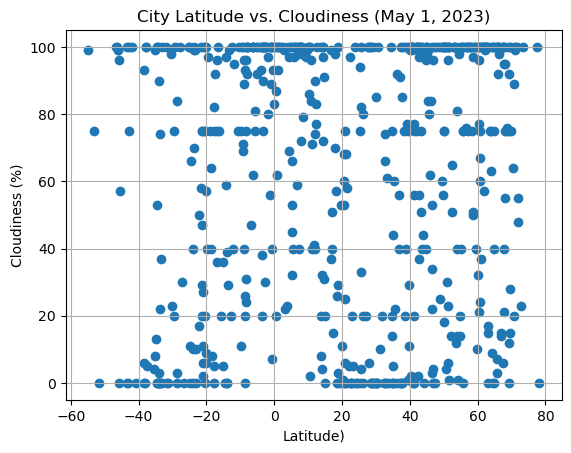

In [5]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties

plt.xlabel("Latitude)")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (May 1, 2023)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
# plt.show()

#### Latitude vs. Wind Speed Plot

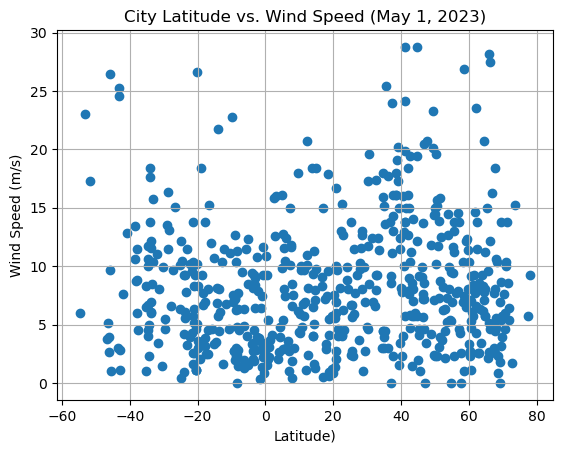

In [6]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties

plt.xlabel("Latitude)")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (May 1, 2023)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
# plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots

def northernlinregress(x,y):
    x_values = northern_hemi_df[x]
    y_values = northern_hemi_df[y]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{x} vs. {y} in Northern Hemisphere")
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(f"The r-value is: {rvalue}")
    plt.annotate(line_eq,(5,5),fontsize=15,color="red")
    plt.show()

def southernlinregress(x,y):
    x_values = southern_hemi_df[x]
    y_values = southern_hemi_df[y]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{x} vs. {y} in Southern Hemisphere")
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(f"The r-value is: {rvalue}")
    plt.annotate(line_eq,(-10,35),fontsize=15,color="red")
    plt.show()

In [9]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,51.66,92,75,1.14,AU,1682949208
1,svetlaya,46.5389,138.3297,36.19,88,22,7.63,RU,1682949208
2,north bend,43.4065,-124.2243,49.86,94,75,5.75,US,1682949208
3,saldanha,-33.0117,17.9442,61.56,74,100,15.77,ZA,1682949208
4,kamenka,51.3223,42.7678,58.46,71,96,7.31,RU,1682949208


In [10]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,svetlaya,46.5389,138.3297,36.19,88,22,7.63,RU,1682949208
2,north bend,43.4065,-124.2243,49.86,94,75,5.75,US,1682949208
4,kamenka,51.3223,42.7678,58.46,71,96,7.31,RU,1682949208
8,aberdeen,57.1437,-2.0981,50.20,85,75,13.80,GB,1682949127
9,bereda,43.2686,-7.5406,76.14,45,100,1.43,ES,1682949209


In [11]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hobart,-42.8794,147.3294,51.66,92,75,1.14,AU,1682949208
3,saldanha,-33.0117,17.9442,61.56,74,100,15.77,ZA,1682949208
5,antofagasta,-23.6500,-70.4000,63.68,76,99,5.55,CL,1682949043
6,mount isa,-20.7333,139.5000,64.17,42,100,9.22,AU,1682949209
7,souillac,-20.5167,57.5167,80.98,83,75,1.14,MU,1682949209


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8488581579961003


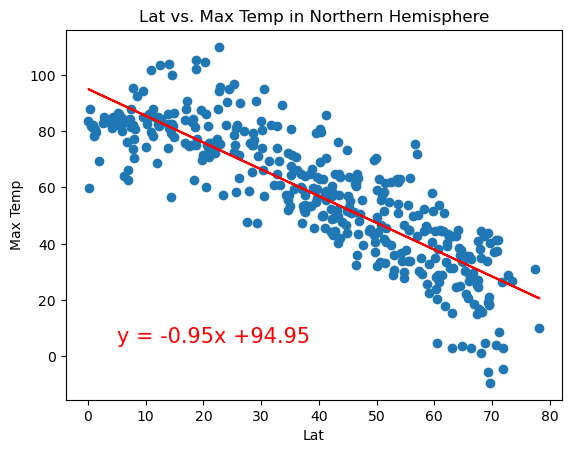

In [12]:
# Linear regression on Northern Hemisphere

northernlinregress("Lat","Max Temp")

The r-value is: 0.8008142560089183


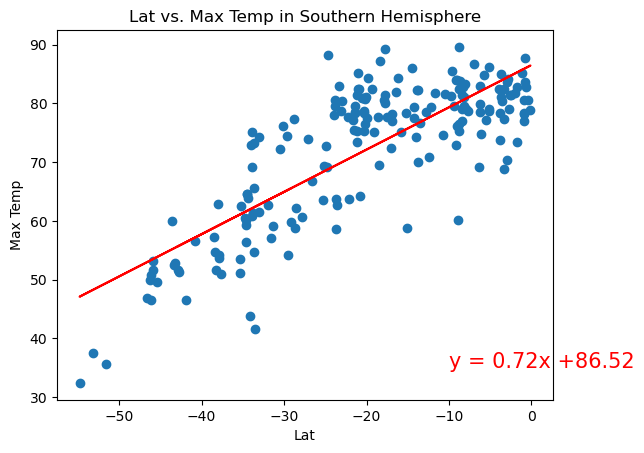

In [21]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

southernlinregress("Lat","Max Temp")

**Discussion about the linear relationship:** In both the northern hemisphere and southern hemisphere we see evidence that there is a strong correlation between latitude and max temperature. In the case of the northern hemisphere, the r-value is approaching -1, indicating that a negative linear relationship exists between latitude and temperature; as latitude increases, max temperature decreases. The inverse is true in the southern hemisphere, where the r-value is approaching 1, indicating that a positive linear relationship exists between latitude and temperature; as latitude increases, max temperature also increases. Both relationships make intuitive sense, as we generally understand that the closer we are to the equator (i.e., the closer latitude is to 0), the higher the temperature will be. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.24202890724515175


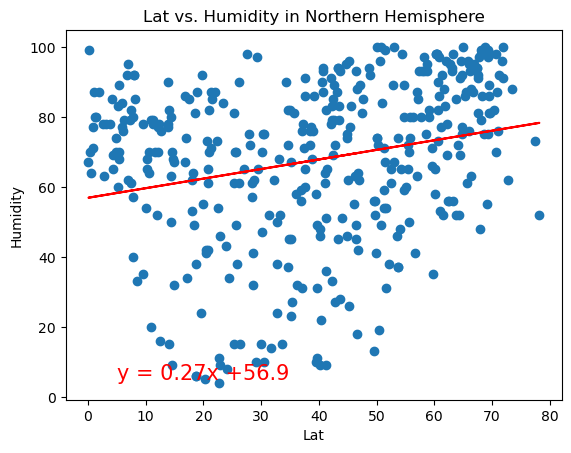

In [14]:
# Northern Hemisphere
# YOUR CODE HERE

northernlinregress("Lat","Humidity")

The r-value is: 0.20600221937668423


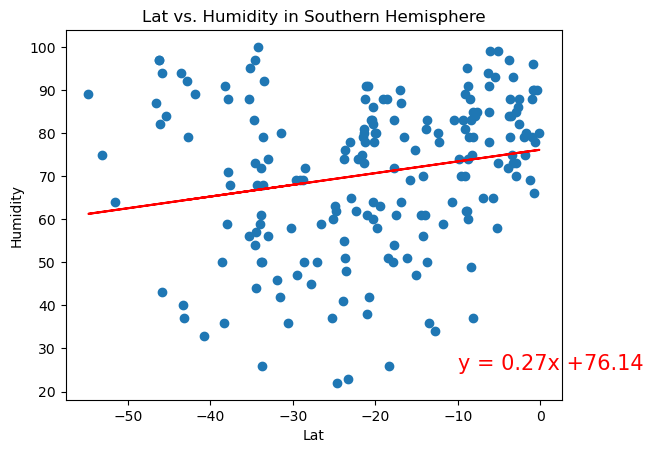

In [15]:
# Southern Hemisphere
# YOUR CODE HERE

southernlinregress("Lat","Humidity")

**Discussion about the linear relationship:** The r-values for both the northern hemisphere and southern hemisphere linear regression calculation indicate that there is not a strong linear relationship (positive or negative) between latitude and humidity. Again, this intuitively makes sense, as we understand that a range of humidities can exists across different temperature ranges. In other words, we cannot confidently predict the humidity of a city based on its latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05859402653632747


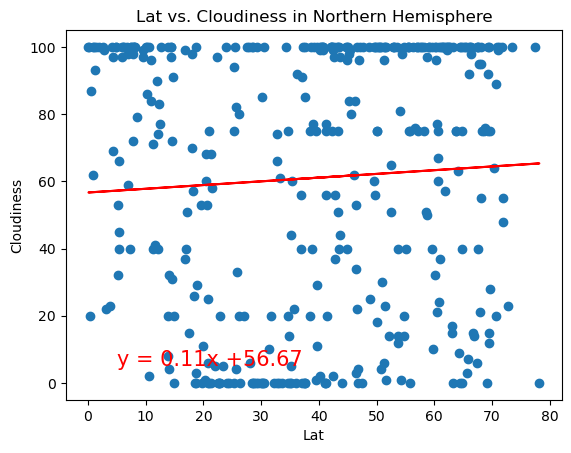

In [16]:
# Northern Hemisphere

northernlinregress("Lat","Cloudiness")

The r-value is: 0.25354678067630415


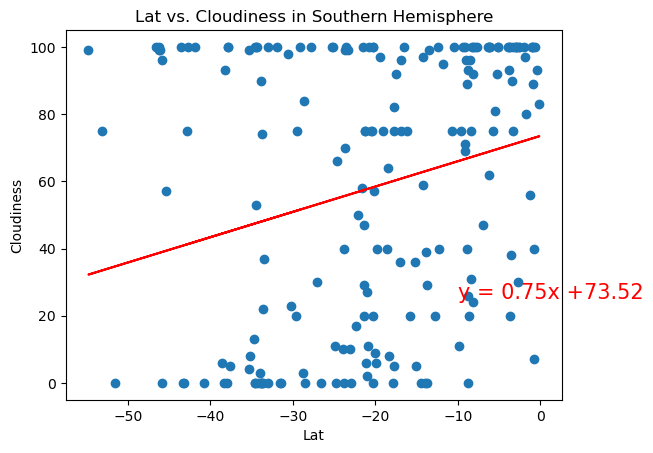

In [17]:
# Southern Hemisphere

southernlinregress("Lat","Cloudiness")

**Discussion about the linear relationship:** As with humidity, the r-values of both the northern and southern hemisphere linear regression calculations do not indicate a strong linear relationship between latitude and cloudiness. Said another way, the latitude of a city does not appear to be a reliable predictor of the cloudiness of that city.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06646189814614838


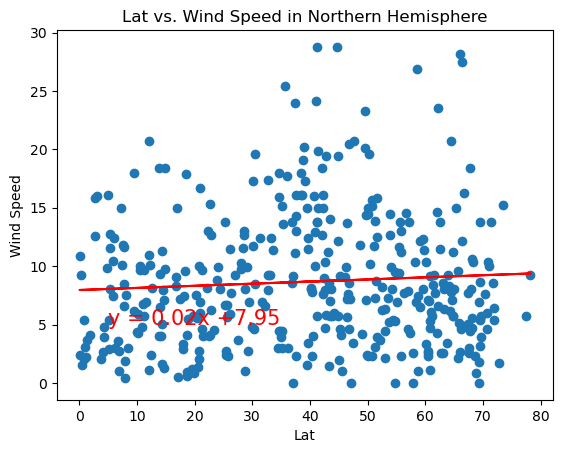

In [18]:
# Northern Hemisphere
# YOUR CODE HERE

northernlinregress("Lat","Wind Speed")

The r-value is: -0.28579965101918586


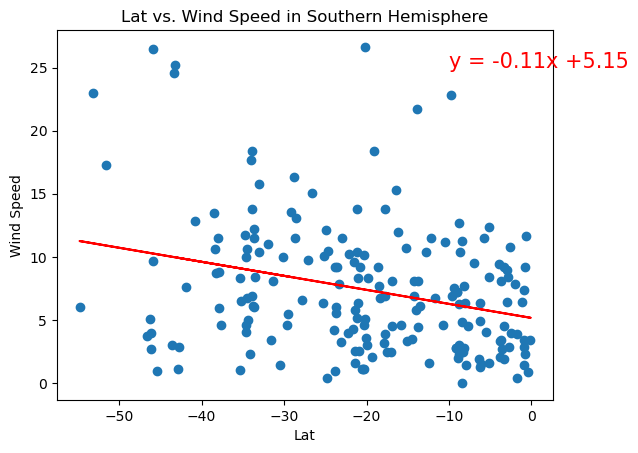

In [19]:
# Southern Hemisphere
# YOUR CODE HERE

southernlinregress("Lat","Wind Speed")

**Discussion about the linear relationship:** As with humidity and cloudiness, the r-values of both the northern and southern hemisphere linear regression calculations do not indicate a strong linear relationship between latitude and wind speed. Said differently, the latitude of a city does not appear to be a reliable predictor of the wind speed in that city. 

Ultimately, the strongest linear relationship in what we've examined in this exercise is the relationship between latitude and temperature. 